In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet101
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/train'
valid_path = 'C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/validation'


# add preprocessing layer to the front of ResNet
res = ResNet101(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in res.layers:
  layer.trainable = False

In [4]:
folders = glob('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/train/*')

# our layers - you can add more if you want
x = Flatten()(res.output)
x = Dense(224, activation='relu')(x)
prediction = Dense(len(folders), activation='sigmoid')(x)
len(folders)

2

In [5]:
model = Model(inputs=res.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 544 images belonging to 2 classes.
Found 125 images belonging to 2 classes.


In [7]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
17/17 [==============================] - 90s 5s/step - loss: 3.0066 - accuracy: 0.7757 - val_loss: 0.5575 - val_accuracy: 0.8000
Epoch 2/50
17/17 [==============================] - 109s 7s/step - loss: 0.5792 - accuracy: 0.7960 - val_loss: 0.5220 - val_accuracy: 0.8000
Epoch 3/50
17/17 [==============================] - 112s 7s/step - loss: 0.5066 - accuracy: 0.7978 - val_loss: 0.4794 - val_accuracy: 0.8000
Epoch 4/50
17/17 [==============================] - 109s 6s/step - loss: 0.4862 - accuracy: 0.7996 - val_loss: 0.4680 - val_accuracy: 0.8000
Epoch 5/50
17/17 [==============================] - 111s 7s/step - loss: 0.4836 - accuracy: 0.8015 - val_loss: 0.4635 - val_accuracy: 0.8000
Epoch 6/50
17/17 [==============================] - 109s 6s/step - loss: 0.4657 - accuracy: 0.8051 - val_loss: 0.4663 - val_accuracy: 0.8000
Epoch 7/50
17/17 [==============================] - 110s 7s/step - loss: 0.4593 - accuracy: 0.8125 - val_loss: 0.4510 - val_accuracy: 0.8160
Epoch 8/50
17/

In [8]:
from keras.models import load_model
model.save('C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/trained_resnet.hdf5')

In [58]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    'C:/Users/harsh/OneDrive/Desktop/intern/data/archive3/tympanic_membrane_dataset_3/validation', # Put your path here
     target_size=(224,224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)
# predictions = model.predict(test_set, steps=test_steps_per_epoch)

# def convert_array(arr_2d):
#     arr_1d = np.zeros(arr_2d.shape[0])
#     arr_1d[arr_2d[:, 0] >= 1] = 1
#     return arr_1d

predicted_classes = np.argmax(predictions, axis = 1)
# predicted_classes = convert_array(predictions)

Found 125 images belonging to 2 classes.
4/4 [==============================] - 13s 3s/step


In [59]:
predictions

array([[2.83717394e-01, 9.19644713e-01],
       [1.56243899e-04, 9.99997497e-01],
       [3.64945992e-03, 9.99902129e-01],
       [5.81481634e-03, 9.99311090e-01],
       [1.73358053e-01, 9.95869458e-01],
       [1.81845903e-01, 9.95310783e-01],
       [1.57087650e-02, 9.99116361e-01],
       [9.93884385e-01, 3.30412085e-03],
       [9.65771377e-02, 9.92552042e-01],
       [2.99784224e-02, 9.89806473e-01],
       [1.39468693e-05, 9.99998391e-01],
       [5.43878553e-03, 9.99787211e-01],
       [2.03161995e-04, 9.99987841e-01],
       [5.68155944e-01, 8.66675973e-01],
       [2.18965247e-01, 9.95810747e-01],
       [9.77044983e-05, 9.99991655e-01],
       [2.68284768e-01, 9.49218452e-01],
       [1.31536392e-03, 9.99997318e-01],
       [1.25109613e-01, 9.73972499e-01],
       [9.38688636e-01, 2.44154558e-01],
       [5.94614685e-01, 8.36985767e-01],
       [4.39777341e-06, 1.00000000e+00],
       [5.43835521e-01, 8.53693187e-01],
       [6.65756315e-03, 9.99699652e-01],
       [1.165200

In [60]:
predicted_classes

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [62]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [63]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

      earwax       0.05      0.08      0.06        25
      normal       0.73      0.62      0.67       100

    accuracy                           0.51       125
   macro avg       0.39      0.35      0.37       125
weighted avg       0.59      0.51      0.55       125



<AxesSubplot: >

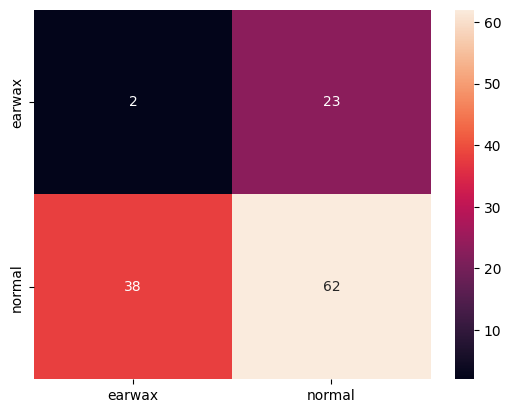

In [65]:
from sklearn.metrics import confusion_matrix
# y_prded_labels = predicted_classes
# y_test = true_classes
# plt.figure(figsize(16 , 9))
import seaborn as sns
cm = confusion_matrix(true_classes , predicted_classes)

sns.heatmap(cm , annot=True , fmt='d' , xticklabels=class_labels , yticklabels = class_labels)

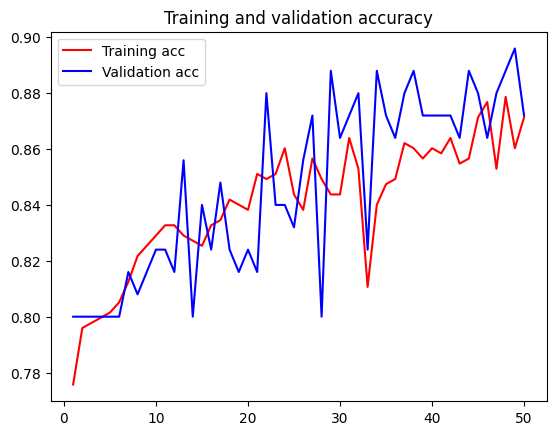

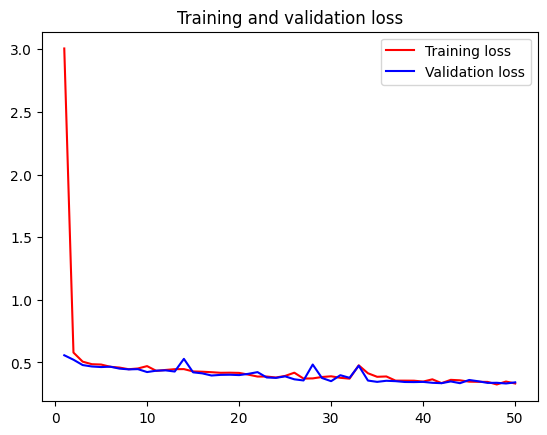

In [66]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()